# Basic operations in datamesh


## Install libraries

In [1]:
# Basic libraries
#!pip install numpy matplotlib cartopy

# Base oceanum library
#!pip install oceanum -U

# Jupyter extention for graphical interaction with datamesh
# !pip install oceanumlab

In [2]:
import warnings
import cartopy.crs as ccrs
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import cartopy.crs as ccrs

from oceanum.datamesh import Connector
from oceanum.datamesh.datasource import Coordinates

plt.rcParams["figure.figsize"] = [20, 10]
warnings.filterwarnings("ignore")

## Connect to datamesh
Define your datamesh token in evironment variables as DATAMESH_TOKEN or insert into argument below.

In [3]:
from oceanum.datamesh import Connector
#Put your datamesh token in the Jupyterlab settings, or as argument in the constructor below
datamesh=Connector()

### Timeseries data
TODO

### Gridded data


In [56]:
# We begin by extracting some data. Of course this can also be done using data that you have already. 
# Here we are extracting 1year of era5 surface winds over new zealand
# We are using query here, just because its faster for remote access of large datasets as the slicing is done on the server, 
# however you could also use load_datasource to get a lazy view of the full 40+y global dataset and slice as required

era5_nz=datamesh.query({
  "datasource": "era5_wind10m",
  "description": "ECMWF ERA5 global 10m wind hindcast",
  "timefilter": {
    "times": [
      "2000-01-01T00:00:00.000Z",
      "2000-01-07T00:00:00.000Z",
    ]
  },
  "geofilter": {
    "type": "bbox",
    "geom": [
      165,
      -48,
      180,
      -33
    ]
  }
})
era5_nz

<xarray.Dataset>
Dimensions:    (latitude: 61, longitude: 61, time: 145)
Coordinates:
  * latitude   (latitude) float32 -33.0 -33.25 -33.5 ... -47.5 -47.75 -48.0
  * longitude  (longitude) float32 165.0 165.2 165.5 165.8 ... 179.5 179.8 180.0
  * time       (time) datetime64[ns] 2000-01-01 ... 2000-01-07
Data variables:
    u10        (time, latitude, longitude) float32 6.509 6.28 ... 4.814 4.804
    v10        (time, latitude, longitude) float32 -6.899 -6.789 ... 2.422 2.587
Attributes:
    Conventions:   CF-1.6
    history:       2024-01-06 05:08:35 GMT by grib_to_netcdf-2.25.1: /opt/ecm...
    _coordinates:  {"t":"time","x":"longitude","y":"latitude"}

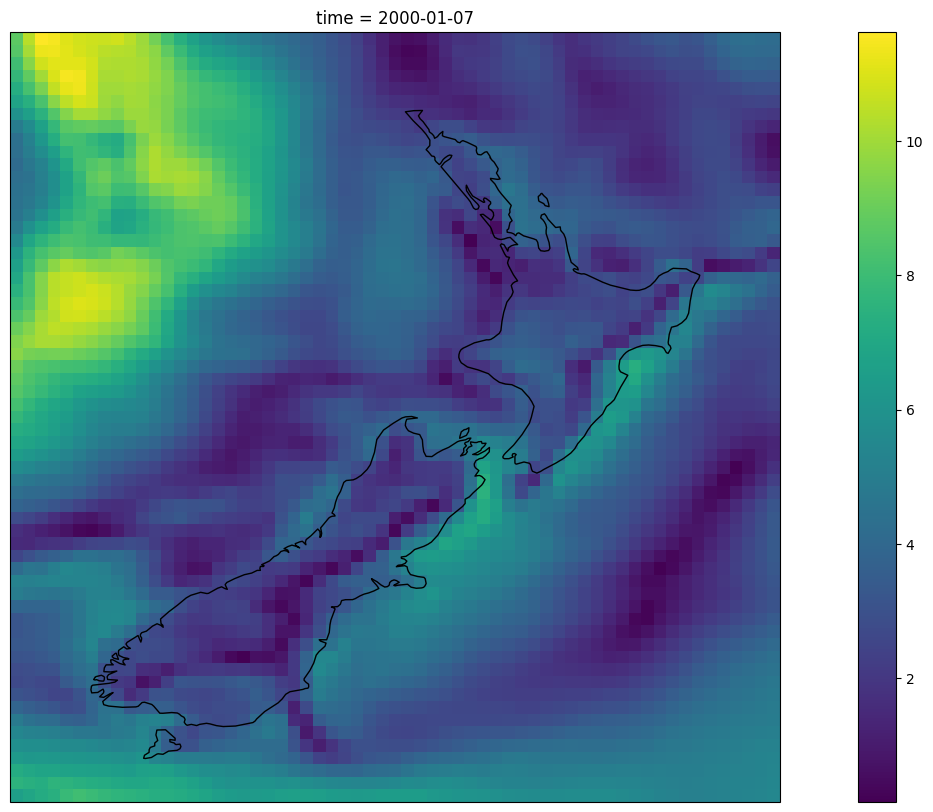

In [57]:
# Lets plot a single windspeed timestep to check the data
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
((era5_nz.u10.isel(time=-1) ** 2 + era5_nz.v10.isel(time=-1) **2 ) ** 0.5).plot(ax=ax, transform=ccrs.PlateCarree())
ax.coastlines()

In [ ]:
# Lets do some simple calculation. In this case, lets take the maean over time and plot the results

In [66]:
# Lets check our current era5 datasets
cat = datamesh.get_catalog('era5')
cat.ids

['oceanum_wave_nz5km_era5_spec',
 'era5_mean_surface_downward_short_wave_radiation_flux',
 'oceanum_wave_glob05_era5_v1_grid',
 'oceanum_wave_mediterranean_era5_v1_grid',
 'oceanum_wave_nz1km_multiscale_era5_param',
 'oceanum_wave_nz1km_nz01_era5_spec',
 'oceanum_wave_nz1km_nz02_era5_spec',
 'oceanum_wave_nz1km_nz03_era5_spec',
 'oceanum_wave_nz1km_nz04_era5_spec',
 'oceanum_wave_nz1km_nz05_era5_spec',
 'oceanum_wave_nz1km_nz06_era5_spec',
 'oceanum_wave_nz1km_nz07_era5_spec',
 'oceanum_wave_nz1km_nz08_era5_spec',
 'oceanum_wave_nz1km_nz09_era5_spec',
 'oceanum_wave_nz1km_nz10_era5_spec',
 'oceanum_wave_nz1km_nz11_era5_spec',
 'oceanum_wave_nz1km_nz12_era5_spec',
 'oceanum_wave_nz1km_nz13_era5_spec',
 'oceanum_wave_nz1km_nz14_era5_spec',
 'oceanum_wave_nz1km_nz15_era5_spec',
 'oceanum_wave_nz1km_nz16_era5_spec',
 'oceanum_wave_nz1km_nz17_era5_spec',
 'oceanum_wave_nz1km_nz18_era5_spec',
 'oceanum_wave_nz1km_nz19_era5_spec',
 'oceanum_wave_nz1km_nz20_era5_spec',
 'oceanum_wave_nz_era5_v

In [82]:
# Lets check the docs to write the datasource
datamesh.write_datasource?

Signature:
datamesh.write_datasource(
    datasource_id,
    data,
    geometry=None,
    append=None,
    overwrite=False,
    **properties,
)
Docstring:
Write a datasource to datamesh from the work environment

Args:
    datasource_id (string): Unique datasource id
    data (Union[:obj:`pandas.DataFrame`, :obj:`geopandas.GeoDataFrame`, :obj:`xarray.Dataset`, None]):  The data to be written to datamesh. If data is None, just update metadata properties.
    geometry (:obj:`oceanum.datasource.Geometry`, optional): GeoJSON geometry of the datasource
    append (string, optional): Coordinate to append on. default=None
    overwrite (bool, optional): Overwrite existing datasource. default=False
    **properties: Additional properties for the datasource - see :obj:`oceanum.datamesh.Datasource`

Returns:
    :obj:`oceanum.datamesh.Datasource`: The datasource instance that was written to
File:      /source/github-oceanum-io/notebooks/.venv/lib/python3.11/site-packages/oceanum/datamesh/connect

In [83]:
# As mentioned in the docs above, lets check the relevant datasource properties that we may want to write
from oceanum.datamesh import Datasource
Datasource?

Init signature:
Datasource(
    *,
    id: typing.Annotated[str, MinLen(min_length=3), MaxLen(max_length=80), _PydanticGeneralMetadata(pattern='^[a-z0-9-_]+$')],
    name: typing.Annotated[str, MaxLen(max_length=64)],
    description: Annotated[Optional[str], MaxLen(max_length=1500)] = '',
    parameters: Optional[dict] = {},
    geom: Annotated[Union[shapely.geometry.point.Point, shapely.geometry.multipoint.MultiPoint, shapely.geometry.polygon.Polygon], <class 'oceanum.datamesh.datasource._GeometryAnnotation'>],
    tstart: Optional[datetime.datetime] = None,
    tend: Optional[datetime.datetime] = None,
    parchive: Optional[Annotated[datetime.timedelta, BeforeValidator(func=<function parse_period at 0x7f337585cd60>)]] = None,
    tags: Optional[list] = [],
    info: Optional[dict] = '',
    schema: Optional[oceanum.datamesh.datasource.Schema] = Schema(attrs={}, dims={}, coords={}, data_vars={}),
    coordinates: Dict[oceanum.datamesh.datasource.Coordinates, str],
    details: Optio

In [92]:
# Lets try writing the new data to datamesh. Here we set the tags, times and geom properties to aid searching later
times = era5_nz.time.to_pandas()

datasource = datamesh.write_datasource(datasource_id='era5_nz_10m_wind_demo', 
                          name="Mean NZ ERA5 Surface Winds",
                          description="ERA5 winds over New Zealand", 
                          data=era5_nz, 
                          coordinates={"t":"time","x":"longitude","y":"latitude"},
                          tags=['demo', 'nz', 'era5'],
                          tstart=times[0],
                          tend=times[-1],
                          geom={'type':'Polygon','coordinates':[[[era5_nz.longitude.min(),era5_nz.latitude.min()],
                                                                 [era5_nz.longitude.max(),era5_nz.latitude.min()],
                                                                 [era5_nz.longitude.max(),era5_nz.latitude.max()],
                                                                 [era5_nz.longitude.min(),era5_nz.latitude.max()]]]},
                                                                 
                         )
datasource


        Mean NZ ERA5 Surface Winds [era5_nz_10m_wind_demo]
            Extent: (165.0, -48.0, 180.0, -33.0)
            Timerange: 2000-01-01 00:00:00 to 2000-01-07 00:00:00
            3 attributes
            2 variables
        

In [84]:
# Now if we check again, we should see our demo dataset that we have just written
cat = datamesh.get_catalog('era5')
cat.ids

['oceanum_wave_nz5km_era5_spec',
 'era5_mean_surface_downward_short_wave_radiation_flux',
 'oceanum_wave_glob05_era5_v1_grid',
 'oceanum_wave_mediterranean_era5_v1_grid',
 'oceanum_wave_nz1km_multiscale_era5_param',
 'oceanum_wave_nz1km_nz01_era5_spec',
 'oceanum_wave_nz1km_nz02_era5_spec',
 'oceanum_wave_nz1km_nz03_era5_spec',
 'oceanum_wave_nz1km_nz04_era5_spec',
 'oceanum_wave_nz1km_nz05_era5_spec',
 'oceanum_wave_nz1km_nz06_era5_spec',
 'oceanum_wave_nz1km_nz07_era5_spec',
 'oceanum_wave_nz1km_nz08_era5_spec',
 'oceanum_wave_nz1km_nz09_era5_spec',
 'oceanum_wave_nz1km_nz10_era5_spec',
 'oceanum_wave_nz1km_nz11_era5_spec',
 'oceanum_wave_nz1km_nz12_era5_spec',
 'oceanum_wave_nz1km_nz13_era5_spec',
 'oceanum_wave_nz1km_nz14_era5_spec',
 'oceanum_wave_nz1km_nz15_era5_spec',
 'oceanum_wave_nz1km_nz16_era5_spec',
 'oceanum_wave_nz1km_nz17_era5_spec',
 'oceanum_wave_nz1km_nz18_era5_spec',
 'oceanum_wave_nz1km_nz19_era5_spec',
 'oceanum_wave_nz1km_nz20_era5_spec',
 'oceanum_wave_nz_era5_v

In [93]:
# Now if we check again, we can also search on the tags we have written
cat = datamesh.get_catalog('demo')
cat.ids

['era5_nz_10m_wind_demo']

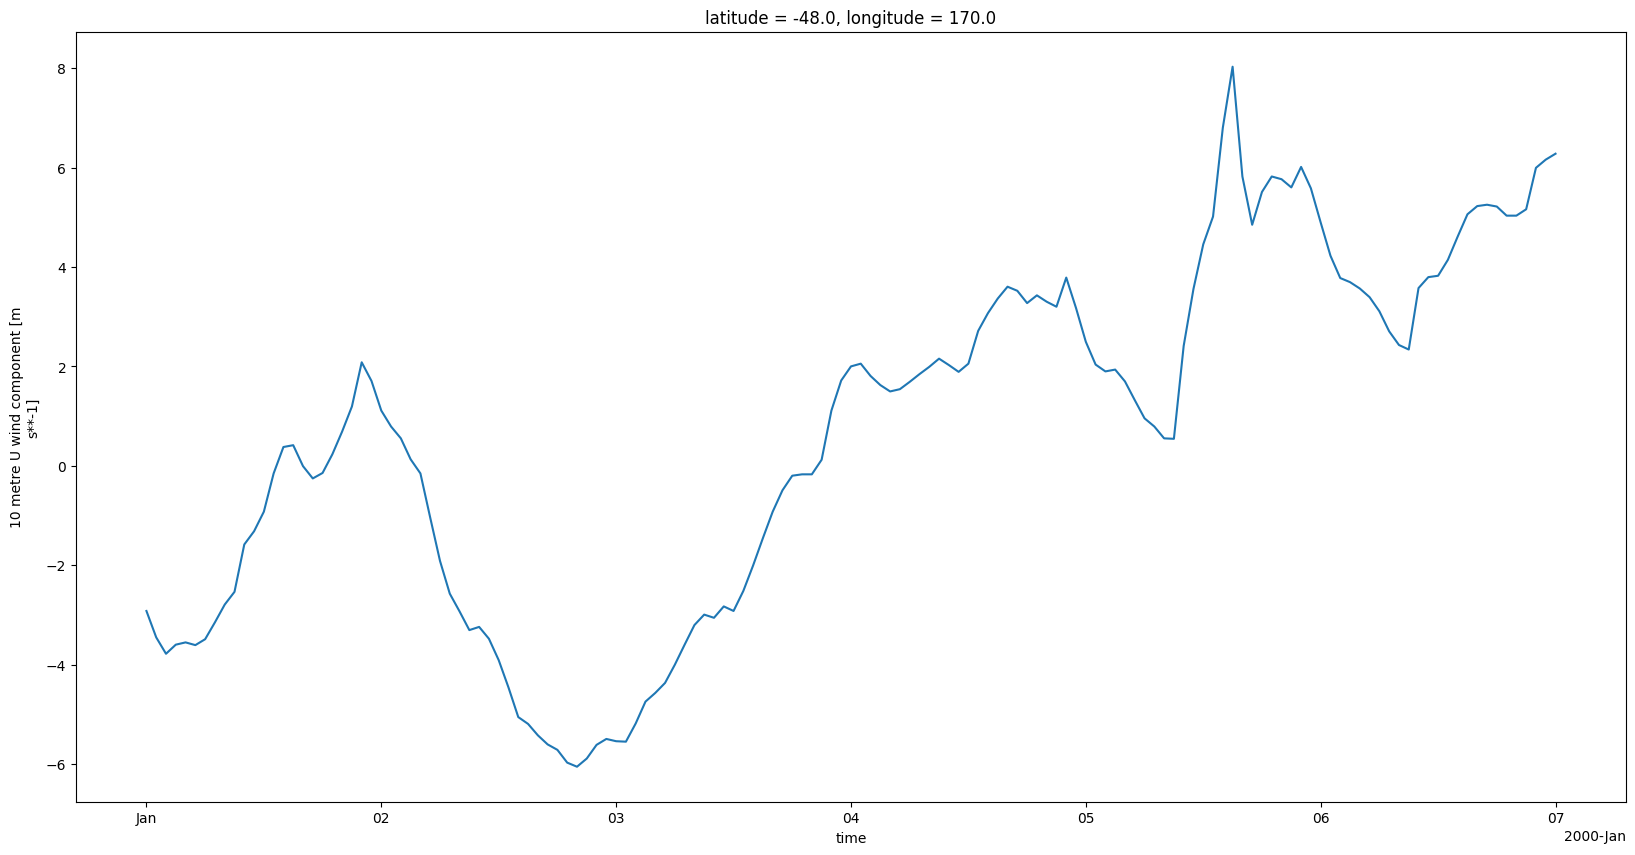

In [94]:
# Now we can treat this dataset like any dataset. 
# For example, lets open the dataset using load_datasource, and extract and plot a single point using standard xarray slicing
ds = datamesh.load_datasource('era5_nz_10m_wind_demo')
ds.u10.sel(latitude=-50, longitude=170, method='nearest').plot()

In [96]:
# Finally, lets delete this demo dataset
datamesh.delete_datasource(datasource_id='era5_nz_10m_wind_demo')

True

In [97]:
# And check thats its gone
cat = datamesh.get_catalog('demo')
cat.ids

[]